# Load libraries

In [154]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sn

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, StratifiedKFold

from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score, roc_auc_score

# Load data

In [155]:
df = pd.read_csv('train_data_cleaned.csv')
df.drop(columns = 'Unnamed: 0', inplace = True)
df.head(10)

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,customer_occupation_code_2.0,customer_occupation_code_3.0,customer_occupation_code_4.0,customer_occupation_code_5.0,customer_occupation_code_6.0,customer_occupation_code_7.0,customer_occupation_code_8.0,customer_occupation_code_9.0,customer_relationship_couple,customer_relationship_single
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
5,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63697 entries, 0 to 63696
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   homebanking_active                 63697 non-null  float64
 1   has_homebanking                    63697 non-null  float64
 2   has_insurance_21                   63697 non-null  float64
 3   has_insurance_23                   63697 non-null  float64
 4   has_life_insurance_fixed_cap       63697 non-null  float64
 5   has_life_insurance_decreasing_cap  63697 non-null  float64
 6   has_fire_car_other_insurance       63697 non-null  float64
 7   has_personal_loan                  63697 non-null  float64
 8   has_mortgage_loan                  63697 non-null  float64
 9   has_current_account                63697 non-null  float64
 10  has_pension_saving                 63697 non-null  float64
 11  has_savings_account                63697 non-null  flo

# Preprocessing

In [157]:
y = df['target'].to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [158]:
x = df.drop(columns = 'target')
x.head()

,homebanking_active,has_homebanking,has_insurance_21,has_insurance_23,has_life_insurance_fixed_cap,has_life_insurance_decreasing_cap,has_fire_car_other_insurance,has_personal_loan,has_mortgage_loan,has_current_account,...,customer_occupation_code_2.0,customer_occupation_code_3.0,customer_occupation_code_4.0,customer_occupation_code_5.0,customer_occupation_code_6.0,customer_occupation_code_7.0,customer_occupation_code_8.0,customer_occupation_code_9.0,customer_relationship_couple,customer_relationship_single
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


## Check multicollinearity

In [159]:
def calc_vif(X):
# Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return(vif)

calc_vif(x)

C:\Users\Lam\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\stats\outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,homebanking_active,3.469041
1,has_homebanking,3.821310
2,has_insurance_21,3.977308
3,has_insurance_23,4.492648
4,has_life_insurance_fixed_cap,1.536350
5,has_life_insurance_decreasing_cap,4.514571
6,has_fire_car_other_insurance,2.399004
7,has_personal_loan,2.199310
8,has_mortgage_loan,3.795912
9,has_current_account,1.820621


<AxesSubplot:>

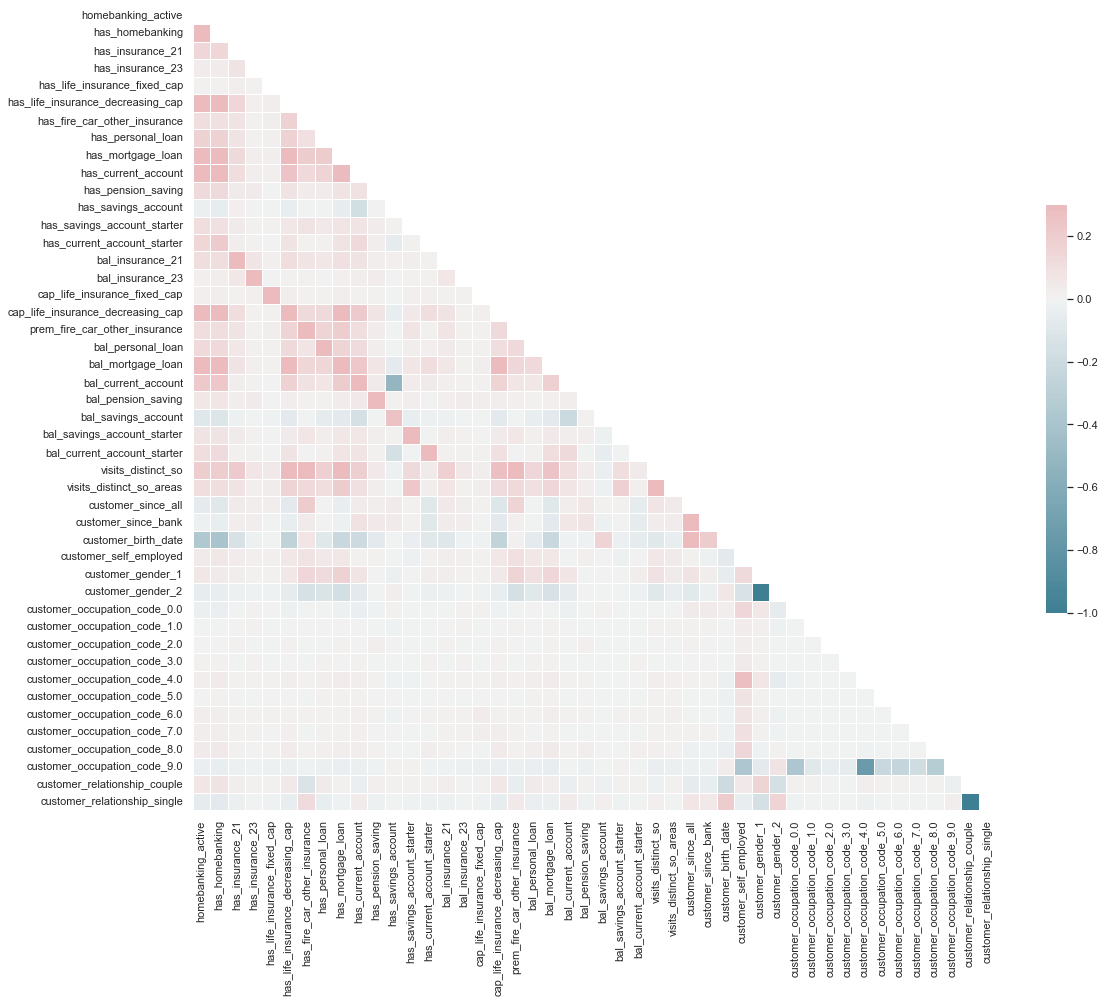

In [160]:
#Set and compute the Correlation Matrix:
sn.set(style="white")
corr = x.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sn.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sn.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Standardize

In [161]:
transform = preprocessing.StandardScaler()
x = transform.fit_transform(x)
x

array([[-0.52363617, -0.62506277, -0.32404721, ...,  0.2167802 ,
         0.49704479, -0.49704479],
       [ 1.90972293,  1.59983933, -0.32404721, ...,  0.2167802 ,
         0.49704479, -0.49704479],
       [ 1.90972293,  1.59983933, -0.32404721, ...,  0.2167802 ,
        -2.01189111,  2.01189111],
       ...,
       [-0.52363617,  1.59983933, -0.32404721, ...,  0.2167802 ,
        -2.01189111,  2.01189111],
       [-0.52363617, -0.62506277, -0.32404721, ...,  0.2167802 ,
         0.49704479, -0.49704479],
       [ 1.90972293,  1.59983933, -0.32404721, ...,  0.2167802 ,
         0.49704479, -0.49704479]])

## Train test split

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [163]:
print('x_train: ', x_train.shape)
print('y_train: ', y_train.shape)
print('x_test: ', x_test.shape)
print('y_test: ', y_test.shape)

x_train:  (50957, 46)
y_train:  (50957,)
x_test:  (12740, 46)
y_test:  (12740,)


# Build model

In [164]:
# ratio of each target
t0 = (df['target'].value_counts()/df['target'].shape[0])[0]
t1 = (df['target'].value_counts()/df['target'].shape[0])[1]

print('ratio of target 0 = {:.4f}'.format(t0))
print('ratio of target 1 = {:.4f}'.format(t1))

ratio of target 0 = 0.9700
ratio of target 1 = 0.0300


In [165]:
# accuracy threshold
acc_thres = df['target'].value_counts()[1]/df['target'].value_counts()[0]
print('accuracy threshold: {:.4f}'.format(1 - acc_thres))

ratio = df['target'].value_counts()[0]/df['target'].value_counts()[1]
print('target 0 : target 1 = {:.4f}'.format(ratio))

accuracy threshold: 0.9690
target 0 : target 1 = 32.2969


In [166]:
y_test.shape[0]

12740

In [167]:
# this function plots the confusion matrix
def plot_confusion_matrix(y,y_predict):

    cm = confusion_matrix(y, y_predict)/y.shape[0]
    ax= plt.subplot()
    sn.heatmap(cm, annot=True, fmt = ".2%", 
                annot_kws = {'size':15}, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['0', '1']); ax.yaxis.set_ticklabels(['0', '1'])

## Logistic Regression

### Without weight class

F1 score: 0.0000
Accuracy Score: 0.9685
Area Under Curve: 0.5000
Recall score: 0.0000


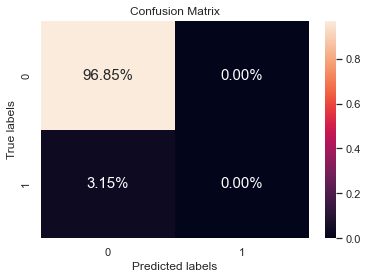

In [168]:
#importing and training the model
lr = LogisticRegression(solver='newton-cg')
lr.fit(x_train, y_train)

# Predicting on the test data
y_pred = lr.predict(x_test)

#Calculating and printing the f1 score 
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)

print('F1 score: {:.4f}'.format(f1))
print('Accuracy Score: {:.4f}'.format(accuracy))
print('Area Under Curve: {:.4f}'.format(roc_auc))
print('Recall score: {:.4f}'.format(recall))

#Ploting the confusion matrix
plot_confusion_matrix(y_test, y_pred)

### With weight class default

F1 score: 0.1102
Accuracy Score: 0.6807
Area Under Curve: 0.6554
Recall score: 0.6284


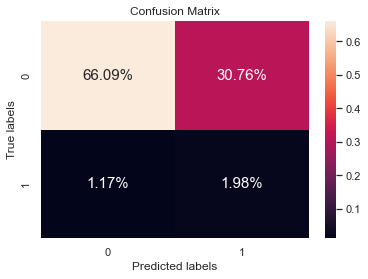

In [169]:
#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight='balanced')
lr.fit(x_train, y_train)

# Predicting on the test data
y_pred = lr.predict(x_test)

#Calculating and printing the f1 score 
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('F1 score: {:.4f}'.format(f1))
print('Accuracy Score: {:.4f}'.format(accuracy))
print('Area Under Curve: {:.4f}'.format(roc_auc))
print('Recall score: {:.4f}'.format(recall))

#Ploting the confusion matrix
plot_confusion_matrix(y_test, y_pred)

### With weight class manual

Fitting 5 folds for each of 200 candidates, totalling 1000 fits


Text(0.5, 1.0, 'Scoring for different class weights')

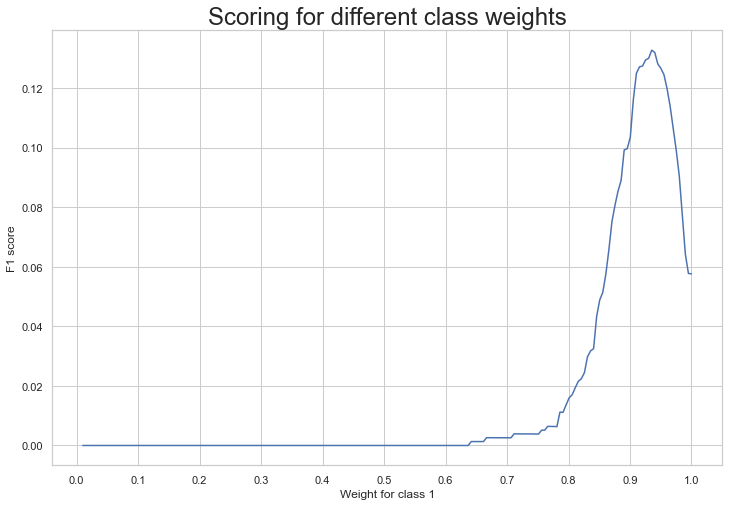

In [170]:
lr = LogisticRegression(solver='newton-cg')

#Setting the range for class weights
weights = np.linspace(0.0,0.99,200)

#Creating a dictionary grid for grid search
param_grid = {'class_weight': [{0:x, 1:1.0-x} for x in weights]}

#Fitting grid search to the train data with 5 folds
gridsearch = GridSearchCV(estimator= lr, 
                          param_grid= param_grid,
                          cv=StratifiedKFold(), 
                          n_jobs=-1, 
                          scoring='f1', 
                          verbose=2).fit(x_train, y_train)

#Ploting the score for different values of weight
sn.set_style('whitegrid')
plt.figure(figsize=(12,8))
weigh_data = pd.DataFrame({'score': gridsearch.cv_results_['mean_test_score'], 'weight': (1- weights)})
sn.lineplot(x = weigh_data['weight'], y = weigh_data['score'])
plt.xlabel('Weight for class 1')
plt.ylabel('F1 score')
plt.xticks([round(i/10,1) for i in range(0,11,1)])
plt.title('Scoring for different class weights', fontsize=24)

In [171]:
weight = gridsearch.best_params_['class_weight']
weight

{0: 0.06467336683417085, 1: 0.9353266331658292}

F1 score: 0.1527
Accuracy Score: 0.8998
Area Under Curve: 0.6033
Recall score: 0.2868


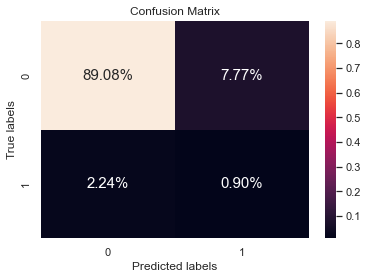

In [172]:

#importing and training the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='newton-cg', class_weight = weight)
lr.fit(x_train, y_train)

# Predicting on the test data
y_pred = lr.predict(x_test)

#Calculating and printing the f1 score 
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('F1 score: {:.4f}'.format(f1))
print('Accuracy Score: {:.4f}'.format(accuracy))
print('Area Under Curve: {:.4f}'.format(roc_auc))
print('Recall score: {:.4f}'.format(recall))

#Ploting the confusion matrix
plot_confusion_matrix(y_test, y_pred)